In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

# HIPPOCAMPUS
_______________________________________________________________________________________________


## ALL TEMPORAL 

In [184]:
cat_list = ['left temporal', 'bilateral temporal','right temporal']
original_data = pd.read_csv('data_09-01.csv')
temporal_data = original_data.loc[original_data['Type'].isin(cat_list)]

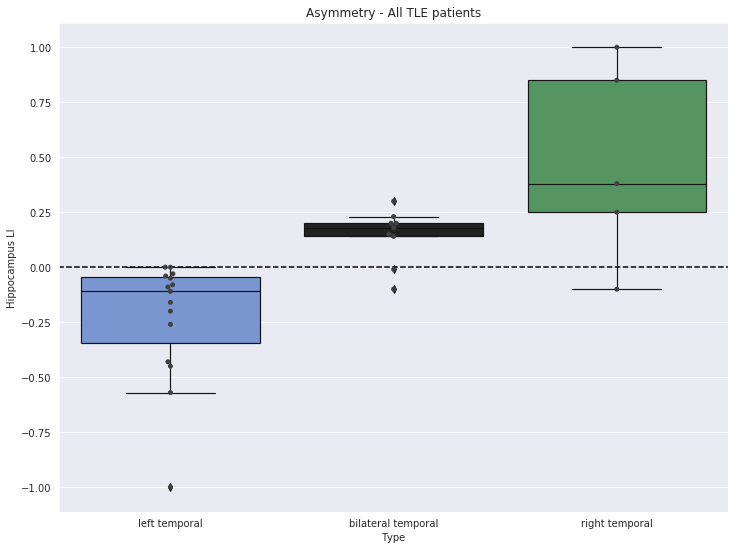

In [213]:
sns.set_style("darkgrid")
type_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
plt.figure(figsize=(12,9))
plt.title("Asymmetry - All TLE patients")
ax = sns.boxplot(x='Type', y='Hippocampus LI', data=temporal_data, order=cat_list, palette=type_palette, linewidth=1.2, saturation=0.7)
ax = sns.swarmplot(x='Type', y='Hippocampus LI', data=temporal_data, color=".25", order=cat_list)
ax.hlines(y=0,xmin=-1,xmax=3, linestyle='dashed')

In [207]:
print("n=" + str(len(temporal_data)))

n=29


## YES and MAYBE mTLE

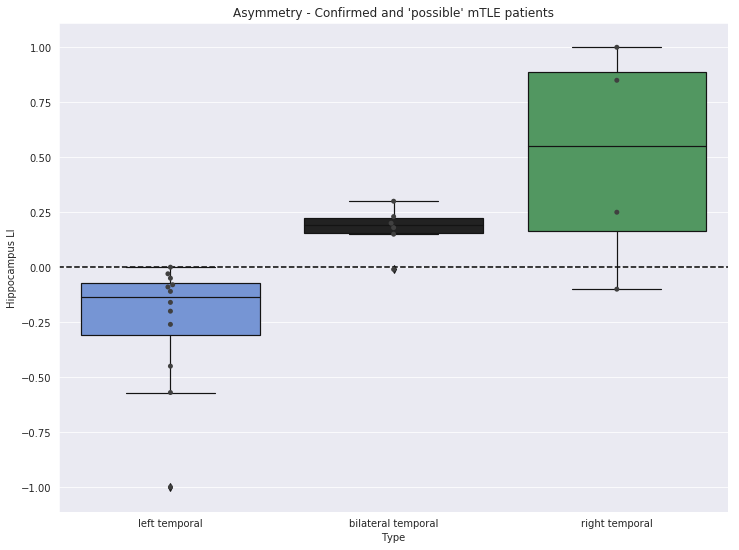

In [186]:
# Filter yes and maybe mTLE
mtl_list = ['Yes','Maybe']
ym_mTLE_data = temporal_data.loc[original_data['MTL'].isin(mtl_list)]


sns.set_style("darkgrid")
type_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
plt.figure(figsize=(12,9))
plt.title("Asymmetry - Confirmed and 'possible' mTLE patients")
ax = sns.boxplot(x='Type', y='Hippocampus LI', data=ym_mTLE_data, order=cat_list, palette=type_palette, linewidth=1.2, saturation=0.7)
ax = sns.swarmplot(x='Type', y='Hippocampus LI', data=ym_mTLE_data, color=".25", order=cat_list)
ax.hlines(y=0,xmin=-1,xmax=3, linestyle='dashed')

In [208]:
print("n="+ str(len(ym_mTLE_data)))

n=22


## YES mTLE 

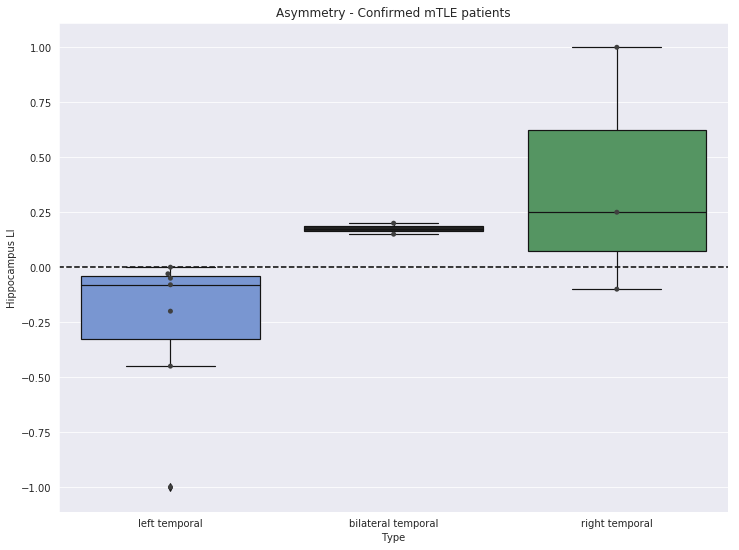

In [214]:
# Filter yes and maybe mTLE
mtl_list = ['Yes']
mTLE_data = temporal_data.loc[original_data['MTL'].isin(mtl_list)]


sns.set_style("darkgrid")
type_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
plt.figure(figsize=(12,9))
plt.title("Asymmetry - Confirmed mTLE patients")
# ax = sns.barplot(x='Type', y='Hippocampus LI', data=df6, order=cat_list, palette=type_palette)
ax = sns.boxplot(x='Type', y='Hippocampus LI', data=mTLE_data, order=cat_list, palette=type_palette, linewidth=1.2, saturation=0.7)
ax = sns.swarmplot(x='Type', y='Hippocampus LI', data=mTLE_data, color=".25", order=cat_list)
ax.hlines(y=0,xmin=-1,xmax=3, linestyle='dashed')

In [209]:
print("n=" + str(len(mTLE_data)))

n=12


In [188]:
def create_plot(cat_list_list, roi_list, bw):
    palette = ['black']
    clr_palette = sns.color_palette(palette)

    fig, axes = plt.subplots(1,3, figsize=(18, 6), sharey=True)
    if len(roi_list) == 2:
        fig.suptitle('{} and {} subject-wise comparison'.format(roi_list[0], roi_list[1]))
    if len(roi_list) == 3:
        fig.suptitle('{}, {}, and {} subject-wise comparison'.format(roi_list[0], roi_list[1], roi_list[2]))
        
    for catno in range(0, len(cat_list_list)):
        cat_list = cat_list_list[catno]
        df = original_data.loc[original_data['Type'].isin(cat_list)]
        regions_df = df[roi_list]# axes[0].plot(roi_list, )
        
        if cat_list[0] == 'left temporal':
            pheno = 'Left TLE'
        elif cat_list[0] == 'bilateral temporal':
            pheno = 'Bilateral TLE'
        elif cat_list[0] == 'right temporal':
            pheno = 'Right TLE'
        else:
            pheno = 'unlabeled phenotype'

        for index, row in regions_df.iterrows():
            row_list = list(row)
            position_list = list(np.linspace(len(row_list)/10,len(row_list)-.5, num=len(row_list),endpoint=False))
            if bw:
                axes[catno].plot(position_list,row_list, 'o-', color='gray', mfc='black',mec='black',lw=1, markersize=5)
            else:
                axes[catno].plot(position_list,row_list, 'o-', lw=1, markersize=5)
            axes[catno].set_xlabel(pheno)
            axes[catno].set_ylabel('Laterality Index')
            axes[catno].set_xlim([0.1,len(row_list)-1])
            axes[catno].set_ylim([-1.05,1.05])
            axes[catno].set_xticks(position_list)
            axes[catno].set_xticklabels(roi_list)

        axes[catno].hlines(y=0,xmin=0,xmax=len(position_list)-1, linestyle='dashed')
            
    return fig

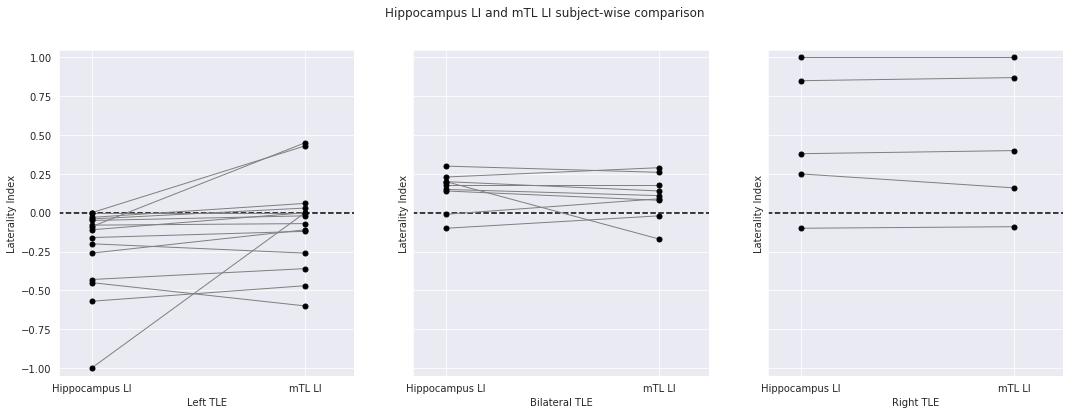

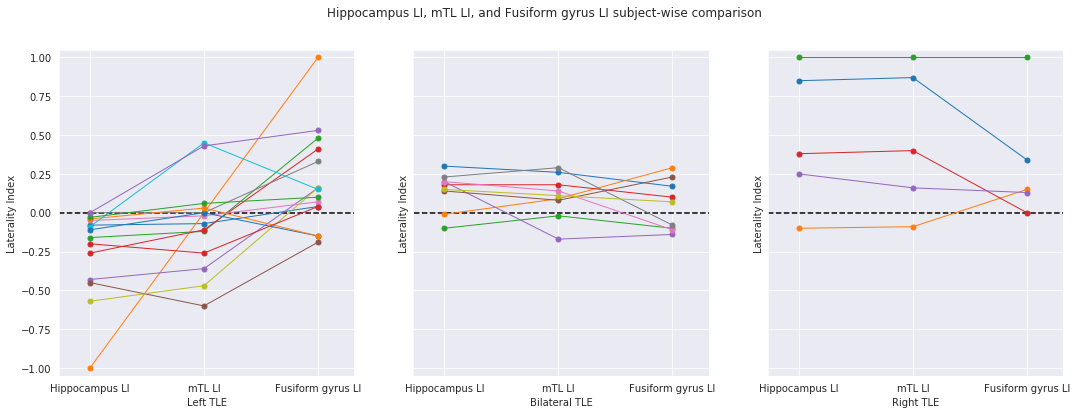

In [201]:
cat_list_list = [['left temporal'], ['bilateral temporal'], ['right temporal']]
roi_list1 = ['Hippocampus LI','mTL LI']
roi_list2 = ['Hippocampus LI', 'mTL LI', 'Fusiform gyrus LI']

plt1 = create_plot(cat_list_list, roi_list1, True)
plt1.savefig('plots/hippo_mTL_comp.png', bbox_inches='tight')
# plt2 = create_plot(cat_list_list, roi_list2, False)
# plt2.savefig('plots/hippo_mTL_ffg_comp.png', bbox_inches='tight')

In [152]:
original_data[['subject','Type','Side','Hippocampus LI', 'mTL LI','Parahippocampal LI','Fusiform gyrus LI', 'Amygdala LI','MTL']]

,subject,Type,Side,Hippocampus LI,mTL LI,Parahippocampal LI,Fusiform gyrus LI,Amygdala LI,MTL
0,P048,bilateral neocortical,Bilateral,0.00,0.00,0.00,-0.57,0.00,No
1,P030,bilateral temporal,Bilateral,0.30,0.26,0.21,0.17,-0.20,Maybe
2,P032,bilateral temporal,Bilateral,-0.01,0.09,0.10,0.29,0.03,Maybe
3,P036,bilateral temporal,Bilateral,-0.10,-0.02,0.03,-0.10,-0.13,NaN
4,P046,bilateral temporal,Bilateral,0.18,0.18,0.18,0.10,0.00,Maybe
5,P067,bilateral temporal,Bilateral,0.20,-0.17,-0.07,-0.14,-1.00,No
6,P068,bilateral temporal,Bilateral,0.14,0.08,0.02,0.23,1.00,NaN
7,P078,bilateral temporal,Bilateral,0.20,0.14,0.25,-0.11,0.00,Yes
8,P091,bilateral temporal,Bilateral,0.15,0.11,-0.13,0.07,0.41,Yes
9,P087,bilateral temporal,Bilateral,0.23,0.29,0.06,-0.08,0.50,Maybe


# Medial Temporal Lobe
_______________________________________________________________________________________________


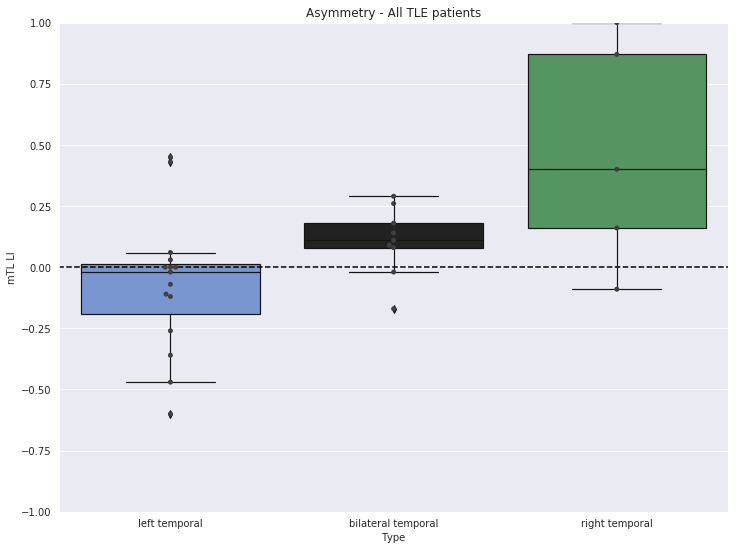

In [204]:
sns.set_style("darkgrid")
type_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
plt.figure(figsize=(12,9))
plt.title("Asymmetry - All TLE patients")
ax = sns.boxplot(x='Type', y='mTL LI', data=temporal_data, order=cat_list, palette=type_palette, linewidth=1.2, saturation=0.7)
ax = sns.swarmplot(x='Type', y='mTL LI', data=temporal_data, color=".25", order=cat_list)
ax.set_ylim(-1,1)
ax.hlines(y=0,xmin=-1,xmax=3, linestyle='dashed')

In [210]:
print("n=" + str(len(temporal_data)))

n=29


## YES and MAYBE mTLE

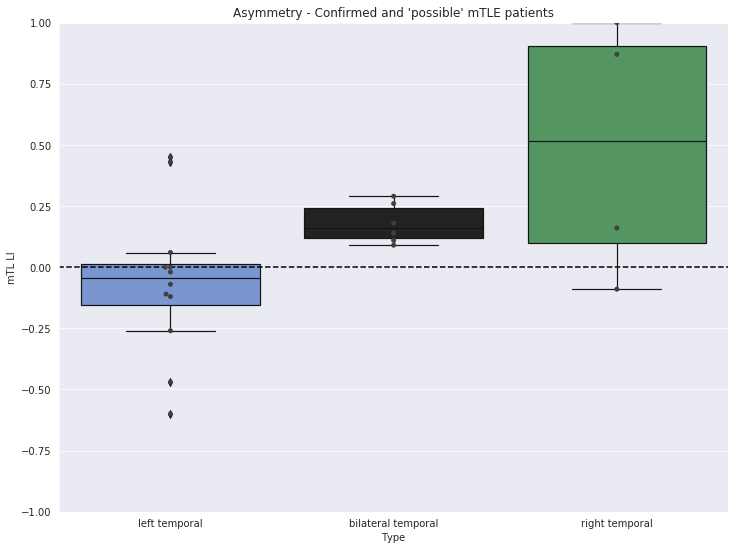

In [205]:
# Filter yes and maybe mTLE
sns.set_style("darkgrid")
type_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
plt.figure(figsize=(12,9))
plt.title("Asymmetry - Confirmed and 'possible' mTLE patients")
ax = sns.boxplot(x='Type', y='mTL LI', data=ym_mTLE_data, order=cat_list, palette=type_palette, linewidth=1.2, saturation=0.7)
ax = sns.swarmplot(x='Type', y='mTL LI', data=ym_mTLE_data, color=".25", order=cat_list)
ax.set_ylim(-1,1)
ax.hlines(y=0,xmin=-1,xmax=3, linestyle='dashed')

In [211]:
print("n="+ str(len(ym_mTLE_data)))

n=22


## YES mTLE

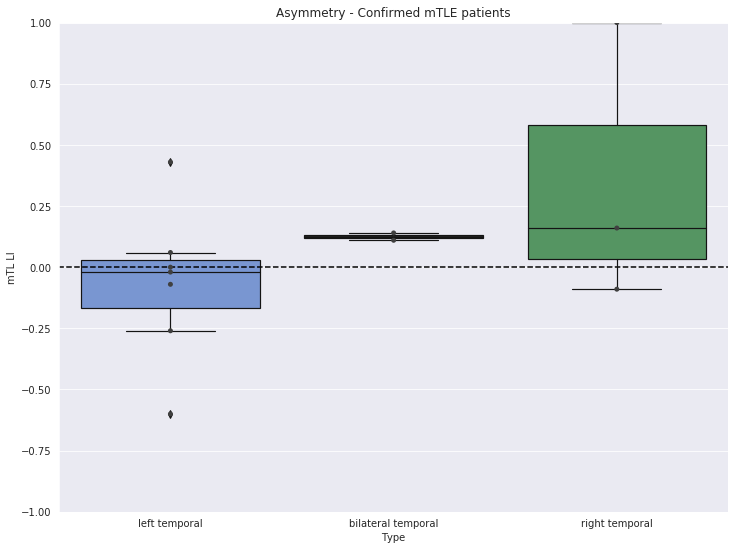

In [206]:
# Filter yes and maybe mTLE
sns.set_style("darkgrid")
type_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
plt.figure(figsize=(12,9))
plt.title("Asymmetry - Confirmed mTLE patients")
ax = sns.boxplot(x='Type', y='mTL LI', data=mTLE_data, order=cat_list, palette=type_palette, linewidth=1.2, saturation=0.7)
ax = sns.swarmplot(x='Type', y='mTL LI', data=mTLE_data, color=".25", order=cat_list)
ax.set_ylim(-1,1)
ax.hlines(y=0,xmin=-1,xmax=3, linestyle='dashed')

In [212]:
print("n=" + str(len(mTLE_data)))

n=12
